In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import os
import cv2
import numpy as np
import imghdr
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from skimage.feature import hog
from skimage.segmentation import find_boundaries
from sklearn.cluster import MeanShift, KMeans

In [4]:

df = pd.read_csv("C://Users//ASUS//Desktop//leaves.csv", header=None)
column_names = ['Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6', 'Column7', 'Column8', 'Column9', 'Column10', 'Column11', 'Column12', 'Column13', 'Column14', 'Column15', 'Column16']
df.columns = column_names
z_scores = np.abs((df - df.mean()) / df.std())
threshold = 3
outliers = (z_scores > threshold).any(axis=1)
df = df[~outliers]
labels = df['Column1']
df = df.drop(['Column1'], axis=1)
for col in df.columns[1:]:
    df[col] = df[col] / df[col].max()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [5]:
counts=np.bincount(labels)
for i, count in enumerate(counts):
    print(f"cluster {i}: {count}")

cluster 0: 0
cluster 1: 12
cluster 2: 10
cluster 3: 10
cluster 4: 8
cluster 5: 12
cluster 6: 4
cluster 7: 10
cluster 8: 11
cluster 9: 14
cluster 10: 5
cluster 11: 3
cluster 12: 12
cluster 13: 13
cluster 14: 12
cluster 15: 10
cluster 16: 0
cluster 17: 0
cluster 18: 0
cluster 19: 0
cluster 20: 0
cluster 21: 0
cluster 22: 11
cluster 23: 11
cluster 24: 13
cluster 25: 3
cluster 26: 12
cluster 27: 11
cluster 28: 12
cluster 29: 12
cluster 30: 10
cluster 31: 5
cluster 32: 11
cluster 33: 9
cluster 34: 2
cluster 35: 11
cluster 36: 6


In [6]:
kmeans = KMeans(n_clusters=labels.max(), random_state=42)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
from collections import Counter
counter =Counter(cluster_labels)
for i, count in counter.items():
    print(f"cluster {i+1}: {count}")

cluster 35: 13
cluster 8: 17
cluster 11: 14
cluster 1: 12
cluster 24: 17
cluster 15: 18
cluster 16: 8
cluster 27: 5
cluster 21: 12
cluster 33: 12
cluster 2: 11
cluster 14: 8
cluster 18: 10
cluster 23: 5
cluster 22: 3
cluster 4: 2
cluster 5: 8
cluster 3: 14
cluster 20: 11
cluster 30: 6
cluster 17: 7
cluster 25: 8
cluster 36: 2
cluster 19: 2
cluster 31: 10
cluster 9: 12
cluster 10: 2
cluster 13: 8
cluster 26: 1
cluster 12: 7
cluster 34: 7
cluster 7: 6
cluster 29: 1
cluster 28: 2
cluster 6: 2
cluster 32: 2


In [8]:
cluster_labels

array([34,  7,  7,  7, 10,  0,  0,  0,  0, 10,  0,  0, 23, 23, 23, 23, 23,
       23,  0, 14, 14, 15, 26, 34, 20, 34, 20, 20, 20, 32, 20, 20,  1, 34,
        7,  7,  7,  7, 32, 13, 17, 17, 17, 17, 22, 17, 17, 17, 22, 22, 22,
       22, 21,  3, 21, 21, 17, 17,  4, 23, 14, 14,  2, 14, 14, 14, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 26,  1, 34, 29, 20, 20, 20, 32,
       16, 16, 14, 24, 24, 24, 29, 26, 29, 35, 35,  3, 18, 18,  4, 30, 30,
        4,  4,  2, 14,  8,  4,  2,  2,  2, 34, 34, 34, 34,  1,  1,  7, 16,
       15, 13, 15, 16, 15,  8, 30,  8,  8, 23, 30,  2, 14,  2,  8,  8,  2,
        9, 12, 12, 12,  9, 12, 12, 12, 12, 12,  4, 23,  4,  4, 25, 17,  2,
        2, 14, 14, 14, 34,  7, 11, 11, 11, 11, 32, 32, 11, 11, 11,  1,  7,
       32,  7,  7,  1, 32,  0, 32, 24, 24, 32,  0, 26, 26, 33, 34, 23, 20,
       32, 13, 13, 20, 32, 14, 13, 20, 14,  7, 34, 34,  7,  7,  7, 15, 13,
       15, 15,  0, 30, 23,  8,  8,  8,  8,  8,  2, 33,  2, 33,  2, 10, 10,
       10, 10, 10, 10, 10

In [9]:
cluster_counts=np.bincount(cluster_labels)
sorted_cluster_counts=sorted(zip(cluster_labels,cluster_counts), key=lambda x:x[1], reverse=True)
for i ,(cluster_label,count) in enumerate (sorted_cluster_counts):
    print(f"cluster {cluster_label+1}: {count}")

cluster 24: 18
cluster 1: 17
cluster 35: 17
cluster 8: 14
cluster 1: 14
cluster 8: 13
cluster 35: 12
cluster 1: 12
cluster 15: 12
cluster 2: 12
cluster 8: 11
cluster 15: 11
cluster 24: 10
cluster 21: 10
cluster 11: 8
cluster 24: 8
cluster 24: 8
cluster 24: 8
cluster 21: 8
cluster 1: 7
cluster 24: 7
cluster 35: 7
cluster 1: 6
cluster 33: 6
cluster 27: 5
cluster 21: 5
cluster 16: 3
cluster 8: 2
cluster 1: 2
cluster 11: 2
cluster 1: 2
cluster 21: 2
cluster 21: 2
cluster 8: 2
cluster 35: 1
cluster 21: 1


In [10]:
print(kmeans.labels_)

[34  7  7  7 10  0  0  0  0 10  0  0 23 23 23 23 23 23  0 14 14 15 26 34
 20 34 20 20 20 32 20 20  1 34  7  7  7  7 32 13 17 17 17 17 22 17 17 17
 22 22 22 22 21  3 21 21 17 17  4 23 14 14  2 14 14 14 19 19 19 19 19 19
 19 19 19 19 19 26  1 34 29 20 20 20 32 16 16 14 24 24 24 29 26 29 35 35
  3 18 18  4 30 30  4  4  2 14  8  4  2  2  2 34 34 34 34  1  1  7 16 15
 13 15 16 15  8 30  8  8 23 30  2 14  2  8  8  2  9 12 12 12  9 12 12 12
 12 12  4 23  4  4 25 17  2  2 14 14 14 34  7 11 11 11 11 32 32 11 11 11
  1  7 32  7  7  1 32  0 32 24 24 32  0 26 26 33 34 23 20 32 13 13 20 32
 14 13 20 14  7 34 34  7  7  7 15 13 15 15  0 30 23  8  8  8  8  8  2 33
  2 33  2 10 10 10 10 10 10 10 10 10 10 10 10 29  1 29  1 24 13 29 24 24
 32  6  6  6 28  6 23 23 23 23 23 23 14 14 14  0  0  1  1  7  1 15 16 13
 16 16  6  6 30 30 30 30 33 33  8 30 33 33  2 27 27  5 31  5 31]


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=0.2, random_state=32)

In [12]:
models = {
    'SVM': SVC(kernel='linear', random_state=32),
    'SVM2': SVC(kernel='rbf', random_state=32),
    'SVM3': SVC(kernel='poly', degree=3, random_state=32),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'KNN2': KNeighborsClassifier(n_neighbors=4),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}
print("here")
pred=pd.DataFrame()
# آموزش مدل‌ها و محاسبه دقت
accuracies = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    pred[model_name]=y_pred
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy
    print(f'{model_name} Accuracy: {accuracy * 100:.2f}%')

# مقایسه دقت مدل‌ها
best_model_name = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model_name]
print(f'\nBest Model: {best_model_name} with Accuracy: {best_accuracy * 100:.2f}%')

here
SVM Accuracy: 59.65%
SVM2 Accuracy: 45.61%
SVM3 Accuracy: 28.07%
Random Forest Accuracy: 56.14%
KNN Accuracy: 50.88%
KNN2 Accuracy: 43.86%
Naive Bayes Accuracy: 61.40%
Decision Tree Accuracy: 40.35%

Best Model: Naive Bayes with Accuracy: 61.40%


In [13]:
def find_most_frequent(row):
  # لیستی از مقادیر ستون های "a", "b" و "c" ایجاد کنید
  values = row[['SVM', 'Random Forest', 'Naive Bayes']].values.flatten()

  # با استفاده از Counter از کتابخانه collections، تعداد دفعات تکرار هر عدد را پیدا کنید
  mode = pd.Series(values).value_counts().idxmax()
  return mode

# اضافه کردن ستون جدید به نام "vote"
pred['vote'] = pred.apply(find_most_frequent, axis=1)

# مشاهده نتیجه

accuracy = accuracy_score(y_test, pred['vote'])
print(accuracy)

0.5964912280701754


In [14]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

# Iterate through each fold
for train_index, test_index in kfold.split(df):
  # Split data into train and test sets
  X_train, X_test = df.iloc[train_index], df.iloc[test_index]
  y_train, y_test = labels.iloc[train_index], labels.iloc[test_index]

  # Create and train a Naive Bayes model
  nb_clf = GaussianNB()
  nb_clf.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = nb_clf.predict(X_test)

  # Calculate accuracy score
  accuracy = accuracy_score(y_test, y_pred)
  cv_scores.append(accuracy)

# Print the average cross-validation score
print( np.mean(cv_scores))

0.6456140350877193


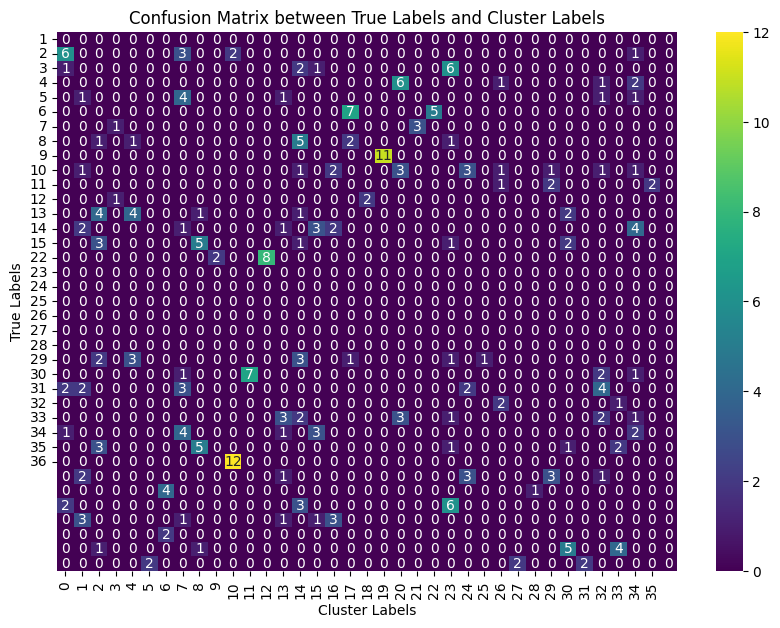

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ایجاد ماتریس تداخل
conf_matrix = confusion_matrix(labels, cluster_labels)

# نمایش ماتریس تداخل
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=np.unique(cluster_labels), yticklabels=np.unique(labels))
plt.xlabel('Cluster Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix between True Labels and Cluster Labels')
plt.show()